### Hello Torch
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [18]:
import torch
import numpy as np
import pandas as pd

tnn = torch.nn
topt = torch.optim

### Data for training

In [19]:
# sample data
study = np.array([2, 2, 2, 2, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8]) / 24
sleep = np.array([2, 4, 6, 8, 2, 4, 6, 8, 2, 4, 6, 8, 2, 4, 6, 8]) / 24
score = np.array([4, 3, 2, 1, 6, 5, 4, 3, 8, 7, 6, 5, 10, 9, 8, 7]) / 10

### Define network

In [28]:
#input size, hidden-layer size, output size
I, H, O = 2, 3, 1

# input tensors
ip_train = torch.FloatTensor([study, sleep])
op_train = torch.FloatTensor([score])

# define model
model = tnn.Sequential(
    tnn.Linear(I, H),
    tnn.Sigmoid(),
    tnn.Linear(H, O),
    tnn.Sigmoid()
)

# define loss calculation method
loss_fn = tnn.MSELoss()

# define solver
optimizer = topt.Adam(model.parameters(), lr=0.1)

### Training loop

0 0.030134161934256554
5 0.00017758358444552869
10 0.03192787617444992
15 0.044801026582717896
20 0.0010099004721269011
25 0.016756907105445862
30 0.033700164407491684
35 0.18690210580825806
40 0.03417925536632538
45 0.08602585643529892
50 0.08201203495264053
55 0.020945297554135323
60 0.10403700172901154
65 0.041797857731580734
70 0.008493759669363499
75 0.0030204292852431536
80 0.011585894040763378
85 0.003865890670567751
90 0.0048505403101444244
95 0.0007336459821090102
100 0.0041505410335958
105 0.0007972802268341184
110 0.000833025318570435
115 0.009658309631049633
120 2.211573246313492e-06
125 0.0021663231309503317
130 0.0004632914497051388
135 0.00036355803604237735
140 0.008904978632926941
145 0.0005223557236604393
150 0.0008889708551578224
155 0.0001572765759192407
160 0.0006042248569428921
165 0.00014972696953918785
170 0.0003896082052960992
175 0.001079699955880642
180 0.0005464814021252096
185 0.0008756780880503356
190 0.0003214924072381109
195 0.003954426851123571


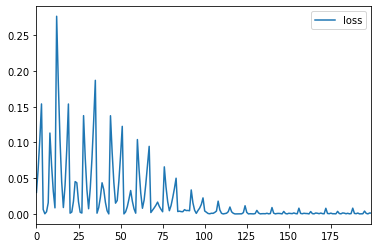

In [30]:
loss_values = []
for t in range(200):
    # forward pass
    op_pred = model(ip_train.transpose(0, 1)[t%16])
    
    # calc loss
    loss = loss_fn(op_pred, op_train.transpose(0, 1)[t%16])
    loss_values.append(loss.item())
    if t%5 == 0:
        print(t, loss.item())
    
    # set grads to 0 before backpropagating
    optimizer.zero_grad()
    
    # backpropagate the loss
    loss.backward()
    
    # update params based on grad
    optimizer.step(None)

# plot loss once training complete. ideally loss should reduce to 0.
df = pd.DataFrame({
    'loss': loss_values
})
df.plot()

### Test model

In [31]:
# test it on a single value of study, sleep
test_study = 24 / 24
test_sleep = 1 / 24
test_score = model(torch.as_tensor([test_study, test_sleep])).item()
print(test_score * 10)

9.802044034004211


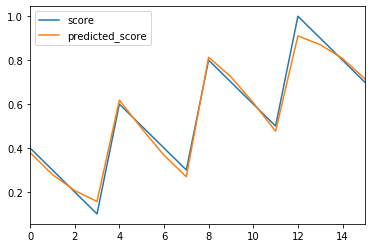

In [32]:
# run it against training data
df = pd.DataFrame({
    'study': study,
    'sleep': sleep,
    'score': score
})

predicted_score = model(torch.FloatTensor(np.array([study, sleep]).T))
df['predicted_score'] = np.array(predicted_score.tolist()).T[0]
df.plot(y=['score', 'predicted_score'])